# Import Libraries and Dataset

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pPic
import folium

url = f'SA-COVID19.xlsx'
dataset = pd.read_excel(url,
nrows= 1274) #cover daily data only
dataset.head()

Daily / Cumulative Indicator       Date                   Event  \
0              Daily     Cases 2020-03-02  First case of COVID-19   
1              Daily     Cases 2020-03-04        Umrah suspension   
2              Daily     Cases 2020-03-07                     NaN   
3              Daily     Cases 2020-03-08                     NaN   
4              Daily     Cases 2020-03-10                     NaN   

           region    City Cases  
0  Eastern Region   Qatif     1  
1  Eastern Region   Qatif     1  
2  Eastern Region   Qatif     2  
3           Total   Total     4  
4  Eastern Region  Dammam     4

# Basic Insight of Dataset

## Check Datatypes and Get Statistical Metrics

In [133]:
dataset.dtypes

Daily / Cumulative            object
Indicator                     object
Date                  datetime64[ns]
Event                         object
region                        object
City                          object
Cases                         object
dtype: object

In [134]:
dataset.describe()

Daily / Cumulative Indicator                 Date  \
count                1274      1274                 1274   
unique                  1         3                   97   
top                 Daily     Cases  2020-06-11 00:00:00   
freq                 1274       706                   45   
first                 NaN       NaN  2020-03-02 00:00:00   
last                  NaN       NaN  2020-06-13 00:00:00   

                                                    Event          region  \
count                                                  46            1274   
unique                                                 13              14   
top     Riyadh, Makkah and Madinah lockdown - curfew (...  Eastern Region   
freq                                                    6             282   
first                                                 NaN             NaN   
last                                                  NaN             NaN   

         City   Cases  
count    1274  1274.0  
unique    157   195.0  
top     Total     1.0  
freq       50   336.0  
first     NaN     NaN  
last      NaN     NaN

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Daily / Cumulative  1274 non-null   object        
 1   Indicator           1274 non-null   object        
 2   Date                1274 non-null   datetime64[ns]
 3   Event               46 non-null     object        
 4   region              1274 non-null   object        
 5   City                1274 non-null   object        
 6   Cases               1274 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 69.8+ KB


# Understanding the Dataset

## Drop Unnecessary Record 'Total'

In [136]:
dataset.drop(dataset.loc[dataset['region']=='Total'].index, inplace=True) 
#drop rows with total in them, total is in region and city but dropping one is equivalent to dropping the two
dataset.head()

Daily / Cumulative Indicator       Date                   Event  \
0              Daily     Cases 2020-03-02  First case of COVID-19   
1              Daily     Cases 2020-03-04        Umrah suspension   
2              Daily     Cases 2020-03-07                     NaN   
4              Daily     Cases 2020-03-10                     NaN   
5              Daily     Cases 2020-03-12                     NaN   

           region    City Cases  
0  Eastern Region   Qatif     1  
1  Eastern Region   Qatif     1  
2  Eastern Region   Qatif     2  
4  Eastern Region  Dammam     4  
5           Mecca   Mecca    21

# Data preprocessing

## Handel Missing Data

In [137]:
dataset['Cases']=dataset['Cases'].replace('?', np.nan) #replacing every ? with null, cases is now 'float64'

In [138]:
cases_mean=dataset['Cases'].mean()
dataset['Cases']=dataset['Cases'].replace(np.nan, cases_mean) #replacing every null in cases with its mean
dataset.head(10)

Daily / Cumulative Indicator       Date                     Event  \
0               Daily     Cases 2020-03-02    First case of COVID-19   
1               Daily     Cases 2020-03-04          Umrah suspension   
2               Daily     Cases 2020-03-07                       NaN   
4               Daily     Cases 2020-03-10                       NaN   
5               Daily     Cases 2020-03-12                       NaN   
6               Daily     Cases 2020-03-13                       NaN   
7               Daily     Cases 2020-03-16  Gov / private suspension   
8               Daily     Cases 2020-03-16  Gov / private suspension   
9               Daily     Cases 2020-03-16  Gov / private suspension   
10              Daily     Cases 2020-03-17                       NaN   

            region    City  Cases  
0   Eastern Region   Qatif    1.0  
1   Eastern Region   Qatif    1.0  
2   Eastern Region   Qatif    2.0  
4   Eastern Region  Dammam    4.0  
5            Mecca   Mecca   21.0  
6            Mecca   Mecca   26.0  
7           Riyadh  Riyadh    4.0  
8            Mecca   Mecca    2.0  
9            Mecca  Jeddah    5.0  
10  Eastern Region   Qatif   10.0

## Drop unnecessary Attributes

In [139]:
dataset=dataset.drop(["Event","Daily / Cumulative"], axis=1) #drop cols event and daily, cumulative
dataset.head()

Indicator       Date          region    City  Cases
0     Cases 2020-03-02  Eastern Region   Qatif    1.0
1     Cases 2020-03-04  Eastern Region   Qatif    1.0
2     Cases 2020-03-07  Eastern Region   Qatif    2.0
4     Cases 2020-03-10  Eastern Region  Dammam    4.0
5     Cases 2020-03-12           Mecca   Mecca   21.0

In [140]:
dataset.describe()

Cases
count  1224.000000
mean     35.041872
std     111.389650
min       1.000000
25%       1.000000
50%       3.000000
75%      14.000000
max    1499.000000

In [141]:
dataset.to_csv('/Users/sulimanreem/Desktop/SA-COVID19.csv')

# Advanced Preprocessing 

## Data binning

In [142]:
bins=np.linspace(min(dataset['Cases']),max(dataset['Cases']),4)
dataset["Cases des"]=pd.cut(dataset['Cases'], bins, labels=["low","mid","high"], include_lowest=True)
dataset.head()

Indicator       Date          region    City  Cases Cases des
0     Cases 2020-03-02  Eastern Region   Qatif    1.0       low
1     Cases 2020-03-04  Eastern Region   Qatif    1.0       low
2     Cases 2020-03-07  Eastern Region   Qatif    2.0       low
4     Cases 2020-03-10  Eastern Region  Dammam    4.0       low
5     Cases 2020-03-12           Mecca   Mecca   21.0       low

## Describtive Statistics

In [143]:
Cases_count= dataset['Indicator'].value_counts()
Cases_count.index.name = 'Indicator'
Cases_count

Indicator
Cases          688
Recoveries     467
Mortalities     69
Name: Indicator, dtype: int64

## Grouping Data 

In [144]:
group_by=dataset[['Indicator','region','Cases']]
group_by_test=group_by.groupby(['Indicator','region'], as_index=False).mean()
Piovt_Table = group_by_test.pivot(index = 'Indicator', columns = 'region')
Piovt_Table

Cases                                                \
region       Al Bahah   Al Jouf      Asir Eastern Region       Hail   
Indicator                                                             
Cases        4.370625  1.888889  5.501102      35.735377  12.181818   
Mortalities       NaN       NaN  2.000000       1.375000        NaN   
Recoveries   2.466667  1.714286  4.300000      31.056911   9.600000   

                                                                          \
region           Jazan      Mecca      Medina    Najran Northern Borders   
Indicator                                                                  
Cases        10.318182  74.964341   47.206202  4.777778         4.363636   
Mortalities   1.000000   3.805556    2.166667       NaN         1.000000   
Recoveries    8.777778  65.649351  147.241379  3.600000         2.909091   

                                             
region         Qassim     Riyadh      Tabuk  
Indicator                                    
Cases        8.586957  57.007463   7.947368  
Mortalities  1.000000   3.100000   2.000000  
Recoveries   9.350000  48.550725  18.842105

# Visualization

    week        Cases
0     10     4.000000
1     11    51.000000
2     12   133.083744
3     13   177.000000
4     14   220.041872
5     15   661.000000
6     16  1175.083744
7     17  1628.041872
8     18  2051.000000
9     19  1743.000000
10    20  2226.000000
11    21  4208.000000
12    22  1480.000000
13    23  4304.000000
14    24  4922.000000


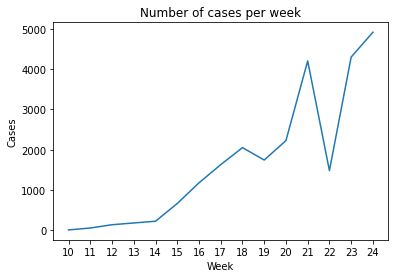

In [145]:
dataset['week']=dataset['Date'].dt.week #divide into weeks

group_by=dataset[['Indicator','week','Cases']] 
group_by=group_by.loc[group_by['Indicator']=='Cases'] #filter through and select 'Cases' rows only
group_by=group_by.drop(["Indicator"], axis=1) #col Indicator not needed

group_by_test1=group_by.groupby(['week'], as_index=False).sum() #total of cases per week
print(group_by_test1)
group_by_test1=group_by_test1.drop(["week"], axis=1) #col week not needed
group_by_test1.plot(kind="line", legend=None)
pPic.xticks(np.arange(15), range(10,25)) #24 weeks
pPic.title("Number of cases per week") 
pPic.ylabel('Cases')
pPic.xlabel('Week')
pPic.show()

       City    Total
120  Riyadh  10159.0
87   Jeddah   6187.0
100   Mecca   5899.0
101  Medina   5838.0
70   Dammam   2704.0
      Cases                                
City Dammam  Jeddah   Mecca  Medina  Riyadh
week                                       
11      4.0     0.0    47.0     0.0     0.0
12     26.0    19.0     5.0     0.0     4.0
13     12.0    95.0    28.0    15.0    18.0
14      8.0    80.0    22.0    56.0     0.0
15      0.0   120.0    54.0     3.0   461.0
16      0.0   598.0    62.0   181.0   219.0
17     80.0   215.0   820.0     6.0   150.0
18    257.0   400.0   658.0   304.0   514.0
19    383.0   452.0   447.0   449.0   317.0
20    495.0    85.0  1419.0  1892.0   825.0
21    215.0  1210.0   449.0  1944.0  2674.0
22    634.0  1353.0   367.0   361.0  1455.0
23    299.0   945.0   887.0   204.0  1585.0
24    291.0   615.0   634.0   423.0  1937.0


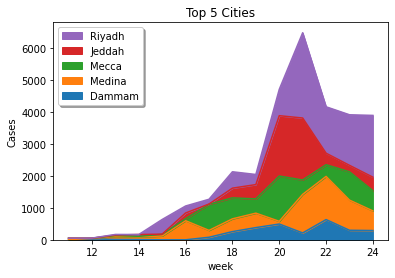

In [146]:
#create col total for each city to know the top five cities

total_cases=dataset[['City','Cases']]
total_cases_groupby=total_cases.groupby(['City'], as_index=False).sum()
total_cases_groupby.sort_values(['Cases'], ascending = False, axis = 0, inplace = True)
total_cases_groupby.rename(columns={'Cases':'Total'}, inplace=True)
total_cases_top_five=total_cases_groupby.head(5)
print(total_cases_top_five) 
top_five_cities=total_cases_top_five['City'].values #top five cities

#getting total of cases in each city per week
group_by=dataset[['City','Cases', 'week']] #select these two cols
group_by_test1=group_by.groupby(['City', 'week'], as_index=False).sum() #total of cases per week

#select only the top five cities
top_five_cities_df=group_by_test1.loc[group_by_test1['City'].isin(top_five_cities)]
#transform into pivot table
Piovt_Table = top_five_cities_df.pivot(index = "week", columns = "City")
Piovt_Table=Piovt_Table.replace(np.nan, 0)
print(Piovt_Table)

ax=Piovt_Table.plot(kind = 'area')
pPic.title('Top 5 Cities')
pPic.ylabel('Cases')
#order handels and labels in legend by most cases
handles, labels = ax.get_legend_handles_labels()
labels=top_five_cities[::-1] 
ax.legend(handles[::-1], labels[::-1], loc='upper left', fancybox=True, shadow=True)
pPic.show()

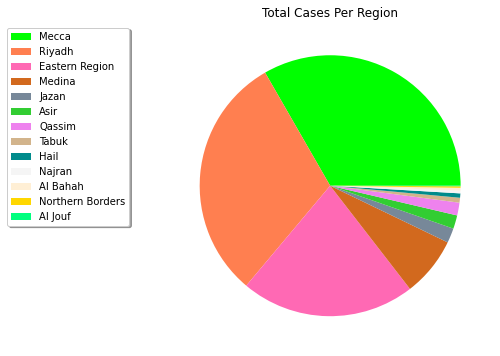

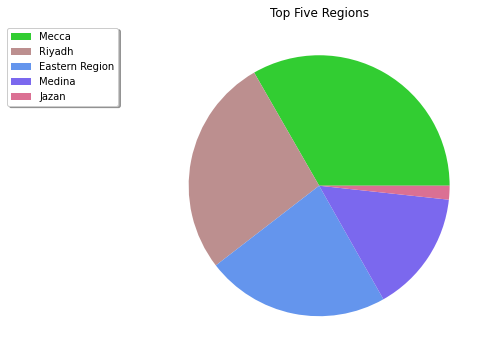

In [147]:
import random
import matplotlib.colors as mcolors

group_by=dataset[['Indicator','region','Cases']]
group_by=group_by.loc[group_by['Indicator']=='Cases']
group_by=group_by.drop(["Indicator"], axis=1)
group_by_test=group_by.groupby(['region'], as_index=False).sum()
group_by_test.sort_values(['Cases'], ascending = False, axis = 0, inplace = True)
group_by_test
cs = random.sample(list(mcolors.CSS4_COLORS.values()),k = int(group_by_test.size/2))
group_by_test['Cases'].plot(kind="pie",figsize=(8, 6), labels=None, colors=cs)
labels=group_by_test['region'].values
pPic.legend(labels, bbox_to_anchor=(-0.1, 1.), fancybox=True, shadow=True)
pPic.ylabel(None)
pPic.title("Total Cases Per Region")
pPic.show()

#top five regions 
group_by=dataset[['region','Cases']]
group_by_test1=group_by.groupby(['region'], as_index=False).sum()
group_by_test1.sort_values(['Cases'], ascending = False, axis = 0, inplace = True)
top_five_regions=group_by_test1.head(5)
labels=top_five_regions['region'].values
cs = random.sample(list(mcolors.CSS4_COLORS.values()),k = int(top_five_regions.size/2))

top_five_regions.plot(kind='pie',figsize=(8, 6), y='Cases', labels=None, colors=cs)
pPic.legend(labels, bbox_to_anchor=(-0.1, 1.), fancybox=True, shadow=True)
pPic.ylabel(None)
pPic.title("Top Five Regions")
pPic.show()

In [148]:
state_geo = r'SA_regions.json'

group_by=dataset[['Indicator','region','Cases']]
group_by=group_by.loc[group_by['Indicator']=='Cases']
group_by=group_by.drop(["Indicator"], axis=1)
group_by_test=group_by.groupby(['region'], as_index=False).sum()

state_data = group_by_test

state_data['region']=state_data['region'].replace('Al Bahah', 'Bahah')
state_data['region']=state_data['region'].replace('Jazan', 'Jizan')
state_data['region']=state_data['region'].replace('Northern Borders', 'Northern Region')
state_data['region']=state_data['region'].replace('Al Jouf', 'Jawf')
state_data['region']=state_data['region'].replace('Mecca', 'Makkah')
state_data['region']=state_data['region'].replace('Medina', 'Madinah')
print(state_data)

SA_Data = folium.Map(location = [23.885942, 45.079163], zoom_start = 5)

folium.Choropleth(
geo_data = state_geo,
name = 'choropleth',
data = state_data,
columns = ['region', 'Cases'],
key_on = 'feature.properties.name',
fill_color = 'YlOrRd',
fill_opacity = 0.7,
line_opacity = 0.2,
legend_name = 'Covid-19 Cases (%)',
).add_to(SA_Data)

folium.LayerControl().add_to(SA_Data)
SA_Data

             region        Cases
0             Bahah    83.041872
1              Jawf    17.000000
2              Asir   418.083744
3    Eastern Region  5396.041872
4              Hail   134.000000
5             Jizan   454.000000
6            Makkah  8321.041872
7           Madinah  1841.041872
8            Najran    86.000000
9   Northern Region    48.000000
10           Qassim   395.000000
11           Riyadh  7639.000000
12            Tabuk   151.000000
